<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_079_momentum%26nesterov_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理，x資料內容3維to1維, y資料內容做OHE
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, neuron_units=[512, 256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.Input(shape=input_shape)
    for i, neurons in enumerate(neuron_units):
        if i == 0:
            x = keras.layers.Dense(units=neurons, activation='relu')(input_layer)
            x = keras.layers.Dropout(0.2)(x)
        else:
            x = keras.layers.Dense(units=neurons, activation='relu')(x)
            x = keras.layers.Dropout(0.2)(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
MOMENTUM = 0.9
EPOCH = 10
BATCH_SIZE = 256

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=lr, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCH, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    results['lr=%s' %str(lr)] = {"train_loss":train_loss,
                                 "valid_loss":valid_loss,
                                 "train_acc":train_acc,
                                 "valid_acc":valid_acc}




Experiment with LR = 0.100000


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 3s 64us/step - loss: 2.0794 - acc: 0.2186 - val_loss: 1.8758 - val_acc: 0.3084
Epoch 2/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.9446 - acc: 0.2819 - val_loss: 1.8448 - val_acc: 0.3300
Epoch 3/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.9187 - acc: 0.2953 - val_loss: 1.8018 - val_acc: 0.3412
Epoch 4/10
50000/50000 [==============================] - 2s 37us/step - loss: 1.8802 - acc: 0.3104 - val_loss: 1.8591 - val_acc: 0.3216
Epoch 5/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.8741 - acc: 0.3122 - val_loss: 1.7875 - val_acc: 0.3612
Epoch 6/10


In [9]:
results_nes = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=lr, momentum=MOMENTUM, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCH, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    results_nes['lr=%s' %str(lr)] = {"train_loss":train_loss,
                                     "valid_loss":valid_loss,
                                     "train_acc":train_acc,
                                     "valid_acc":valid_acc}

Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 48us/step - loss: 2.1132 - acc: 0.2020 - val_loss: 2.0020 - val_acc: 0.2618
Epoch 2/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.9197 - acc: 0.2945 - val_loss: 1.9093 - val_acc: 0.2986
Epoch 3/10
50000/50000 [==============================] - 2s 43us/step - loss: 1.8645 - acc: 0.3174 - val_loss: 1.8212 - val_acc: 0.3334
Epoch 4/10
50000/50000 [==============================] - 2s 38us/step - loss: 1.8325 - acc: 0.3324 - val_loss: 1.7823 - val_acc: 0.3585
Epoch 5/10
50000/50000 [==============================] - 2s 41us/step - loss: 1.8026 - acc: 0.3426 - val_loss: 1.8196 - val_acc: 0.3540
Epoch 6/10
50000/50000 [==============================] - 2s 39us/step - loss: 1.7671 - acc: 0.3601 - val_loss: 1.6978 - val_acc: 0.3892
Epoch 7/10
50000/50000 [==============================] - 2s 40us/step - loss: 1.7480 - acc: 0.366

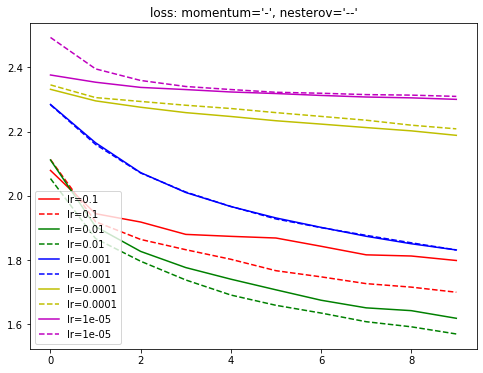

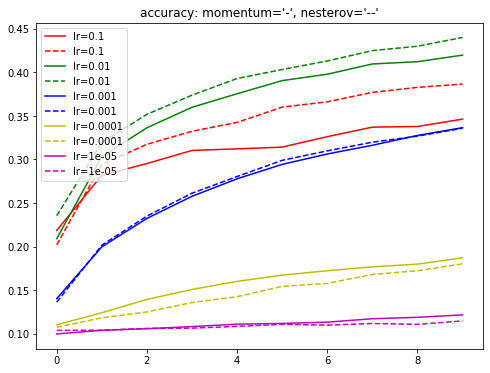

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
lr_colorbar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, key in enumerate(results.keys()):
    plt.plot(results[key]["train_loss"], '-', label=key, color=lr_colorbar[i])
    plt.plot(results_nes[key]["train_loss"], '--', label=key, color=lr_colorbar[i])
plt.title("loss: momentum='-', nesterov='--'")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, key in enumerate(results.keys()):
    plt.plot(results[key]["train_acc"], '-', label=key, color=lr_colorbar[i])
    plt.plot(results_nes[key]["train_acc"], '--', label=key, color=lr_colorbar[i])
plt.title("accuracy: momentum='-', nesterov='--'")
plt.legend()
plt.show()

### Result:
***
- 上圖實線代表只用momentum，虛線代表加入了nesterov。
- 當我們在訓練時，原本只採用momentum進行擬合，在加上nesterov後，在結果上確實比只用momentum來的好。